In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

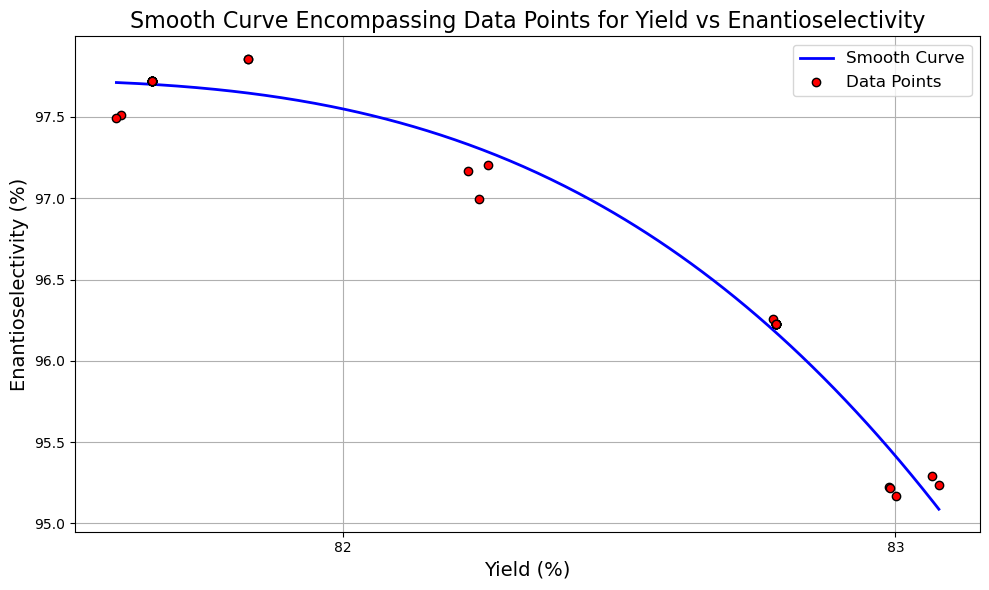

'../pareto.png'

In [2]:
# Load the dataset
file_path = '../outputs/optimization.csv'
data = pd.read_csv(file_path)

# Extracting the necessary columns for the smooth curve
yield_data = data['Yield(%)']
selectivity_data = data['Enantioselectivity(%)']

# Fit the polynomial to the data
degree = 3  # Degree of the polynomial fit
coefficients = np.polyfit(yield_data, selectivity_data, degree)
polynomial = np.poly1d(coefficients)

# Generate a smooth curve
x_axis = np.linspace(yield_data.min(), yield_data.max(), 300)
y_axis = polynomial(x_axis)

# Plot the smooth curve with the data points
plt.figure(figsize=(10, 6))
plt.plot(x_axis, y_axis, color='blue', label='Smooth Curve', linewidth=2)
plt.scatter(yield_data, selectivity_data, color='red', label='Data Points', edgecolor='k', zorder=3)
plt.title('Smooth Curve Encompassing Data Points for Yield vs Enantioselectivity', fontsize=16)
plt.xlabel('Yield (%)', fontsize=14)
plt.ylabel('Enantioselectivity (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()

# Save the figure
output_file = '../pareto.png'
plt.savefig(output_file)

# Show the plot
plt.show()

output_file